In [1]:
import py_compile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


### About the dataset ###

This dataset is collected from kaggle: https://www.kaggle.com/code/heeraldedhia/hierarchical-clustering-for-customer-data/notebook

Including the basic information about the customers of a mall: ID, age, gender, income, and spending score.

The spending Score is something assigned to the customer based on defined parameters like customer behavior and purchasing data.

In [2]:
# read csv
Data = pd.read_csv('Mall_Customers.csv')
Data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
Data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

> There are no missing values that need to fill.

In [4]:
Data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


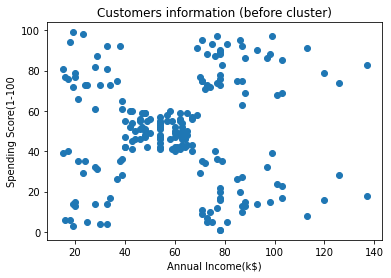

In [20]:
fig, ax = plt.subplots()
ax.scatter(Data.iloc[:, [3]].values, Data.iloc[:, [4]].values)
plt.title('Customers information (before cluster)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.savefig("Customers information (before cluster)")
plt.show()

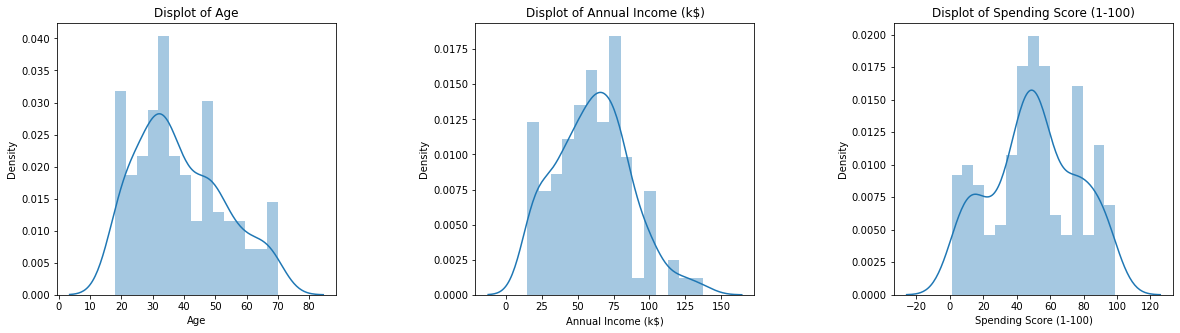

In [21]:
plt.figure(1, figsize = (20,5))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(Data[x], bins = 15)
    plt.title('Displot of {}'.format(x))
plt.savefig("Displot of Age, annual income and spending score")
plt.show()

In [6]:
# Transform the 'Gender' column
label_encoder = preprocessing.LabelEncoder()
Data['Gender'] = label_encoder.fit_transform(Data['Gender'])
Data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


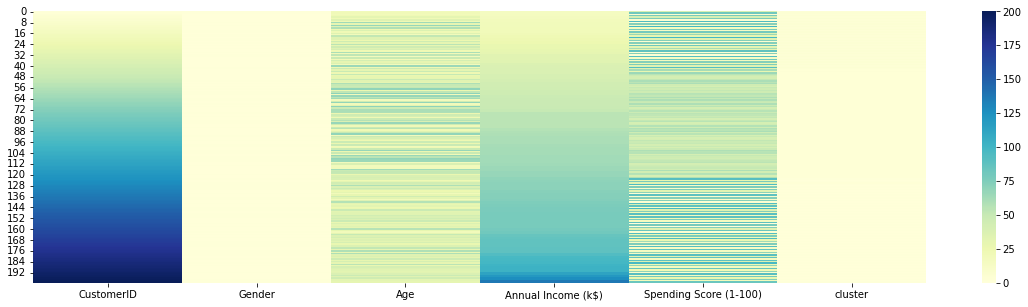

In [22]:
# Heatmap
plt.figure(1, figsize = (20,5))
sns.heatmap(Data, cmap = "YlGnBu")
plt.savefig("heatmap")
plt.show()

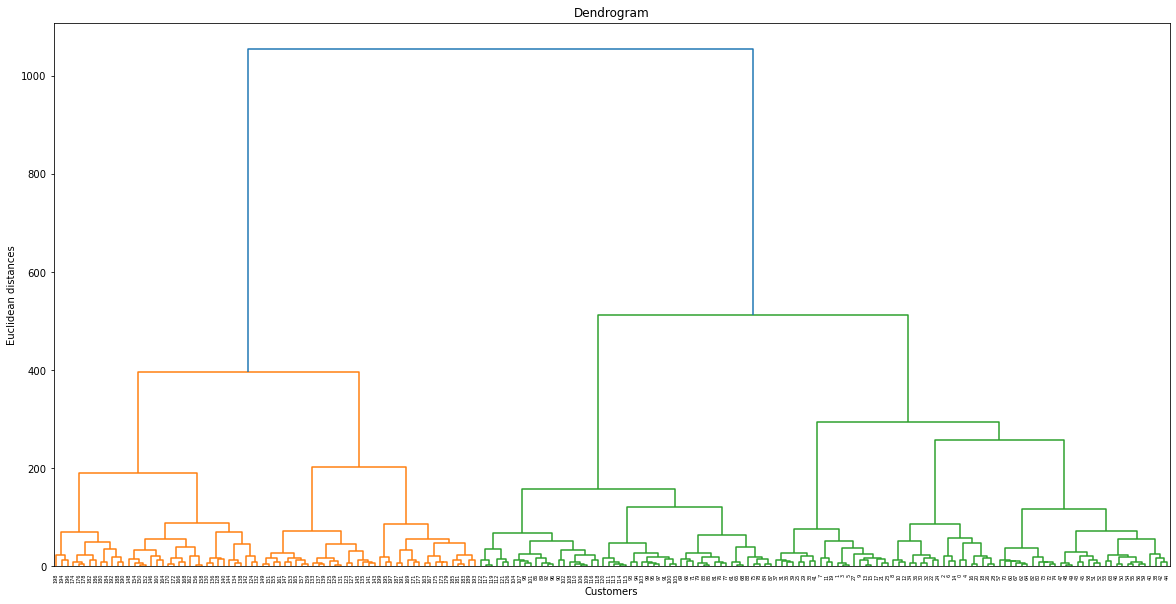

In [23]:
# Dendrogram
plt.figure(1,figsize = (20,10))
dendrogram = sch.dendrogram(sch.linkage(Data, method = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.savefig("Dendrogram")
plt.show()

In [9]:
# Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='average')
y_hc = hc.fit_predict(Data)
y_hc

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [14]:
Data['cluster'] = pd.DataFrame(y_hc)
trace1 = go.Scatter3d(
    x = Data['Age'],
    y = Data['Spending Score (1-100)'],
    z = Data['Annual Income (k$)'],
    mode = 'markers',
        marker = dict(
            color = Data['cluster'],
            size = 4,
            line = dict(
                color = Data['cluster'],
                width = 12
            ),
            opacity = 0.75
        )
)
data = [trace1]
layout = go.Layout(
    title = 'Clusters using Agglomerative Clustering',
    scene = dict(
        xaxis = dict(title = 'Age'),
        yaxis = dict(title = 'Spending Score'),
        zaxis = dict(title = 'Annual Income')
    )
)
fig = go.Figure(data = data, layout = layout)
py.offline.iplot(fig)

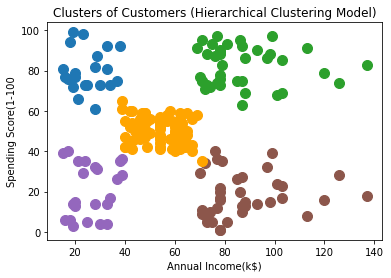

In [24]:
X = Data.iloc[:, [3,4]].values
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s= 100, c = 'tab:brown', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s= 100, c = 'tab:green', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s= 100, c = 'orange', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s= 100, c = 'tab:purple', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s= 100, c = 'tab:blue', label = 'Cluster 5')
plt.title('Clusters of Customers (Hierarchical Clustering Model)')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.savefig("Clusters of Customers (Hierarchical Clustering Model)")
plt.show()

### Cluster analysis ###
| Cluster | Color | Remark |
| :-----: | :---: | :----- |
| 0 | Brown | High income and low spending |
| 1 | Green | High income and high spending |
| 2 | Orange | Medium income and medium spending |
| 3 | Purple | Low income and low spending |
| 4 | Blue | Low income and high spending |

In [13]:
Data.to_csv("Segmented_customers.csv",index = False)